# DC Motor Simulation

Look at the dynamics_model.pdf for the explanation behind this code.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

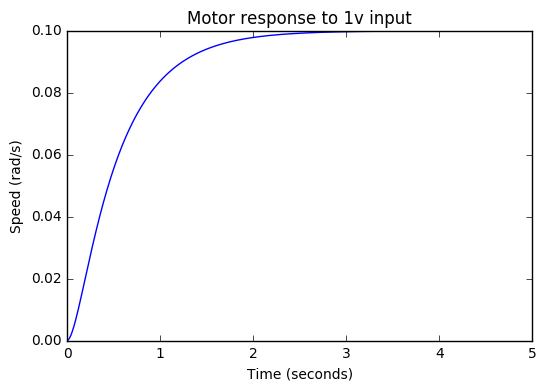

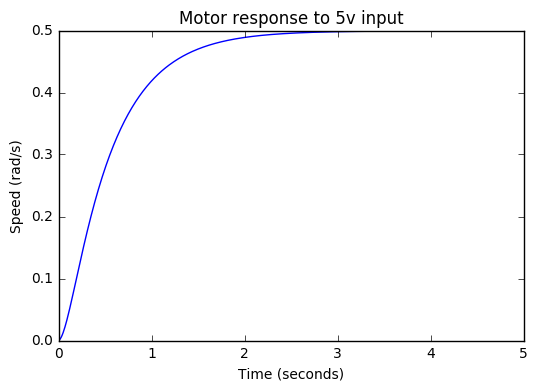

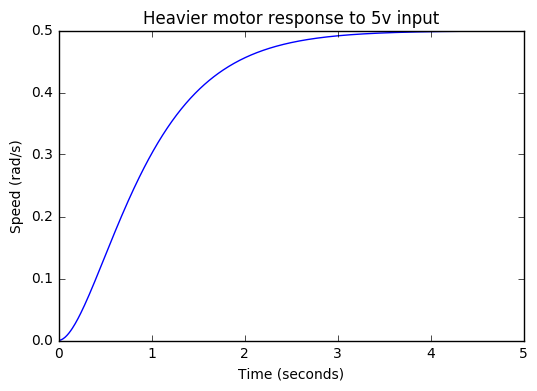

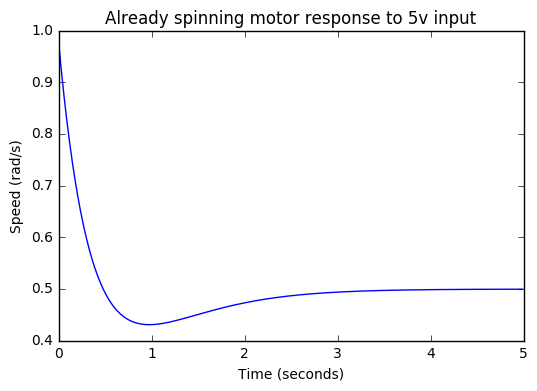

In [54]:
def simulate(V, J, b, K, R, L, theta_dot=0, i=0):
    # simulate T seconds
    T = 5
    dt = 0.01
    theta_dots = []
    ts = np.arange(0, T, dt)
    for t in ts:
        A = np.array([[-b/J,K/J],[-K/L,-R/L]])
        B = np.array([0, 1/L])
        x = np.array([theta_dot, i])
        w = V(t, i, theta_dot)
        x_dot = A@x+B*w
#         print(x_dot, theta_dot, i)
        theta_dot += (x_dot[0] * dt)
        i += (x_dot[1] * dt)
        theta_dots.append(theta_dot)
    
    return ts, theta_dots

def const_V(v):
    def _v(t, i, theta_dot):
        return v
    return _v

ts, theta_dots = simulate(const_V(1), J=0.01, b=0.1, K=0.01, R=1, L=0.5)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Motor response to 1v input")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")

ts, theta_dots = simulate(const_V(5), J=0.01, b=0.1, K=0.01, R=1, L=0.5)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Motor response to 5v input")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")

ts, theta_dots = simulate(const_V(5), J=0.05, b=0.1, K=0.01, R=1, L=0.5)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Heavier motor response to 5v input")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")

ts, theta_dots = simulate(const_V(5), J=0.05, b=0.1, K=0.01, R=1, L=0.5, theta_dot=1)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Already spinning motor response to 5v input")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")


plt.show()

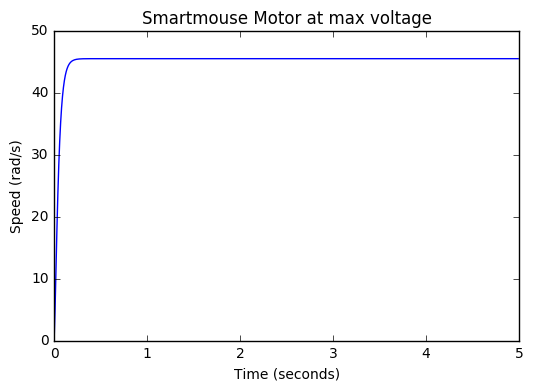

In [89]:

ts, theta_dots = simulate(const_V(5), J=0.001, b=0.05, K=0.01, R=0.02, L=0.001)
plt.figure()
plt.plot(ts, theta_dots)
plt.title("Smartmouse Motor at max voltage")
plt.ylabel("Speed (rad/s)")
plt.xlabel("Time (seconds)")
plt.show()